In [14]:
import jax
import netket as nk
import numpy as np
from netket.operator.spin import sigmax,sigmaz, sigmap, sigmam
import time
from scipy.sparse.linalg import eigsh
import jax.numpy as jnp
import matplotlib.pyplot as plt
from ladder_tool import *

L = 8
periodic = False
hi = nk.hilbert.Spin(s=1 / 2, N =  L*2)

Jv_ = [0.2, 0.4, 0.6]
Jx_ = [0.2, 0.4, 0.6]


for Jv in  Jv_ :
    for Jx in Jx_:
        H = sum([2*(sigmap(hi, 2*y)*sigmam(hi, 2*(y+1))+sigmam(hi, 2*y)*sigmap(hi, 2*(y+1))+sigmap(hi, 2*y+1)*sigmam(hi, 2*(y+1)+1)+sigmam(hi, 2*y+1)*sigmap(hi, 2*(y+1)+1))+sigmaz(hi, 2*y)*sigmaz(hi, 2*(y+1))+sigmaz(hi, 2*y+1)*sigmaz(hi, 2*(y+1)+1) for y in range(L-1) ])  #J-parallel

        H += Jv*sum([2*(sigmap(hi, 2*y)*sigmam(hi, 2*y+1)+sigmam(hi, 2*y)*sigmap(hi, 2*y+1))+sigmaz(hi, 2*y)*sigmaz(hi, 2*y+1) for y in range(L)]) # J-vertical

        H += Jx*sum([2*(sigmap(hi, 2*y)*sigmam(hi, 2*(y+1)+1)+sigmam(hi, 2*y)*sigmap(hi, 2*(y+1)+1)+sigmap(hi, 2*y+1)*sigmam(hi, 2*(y+1))+sigmam(hi, 2*y+1)*sigmap(hi, 2*(y+1)))+sigmaz(hi, 2*y)*sigmaz(hi, 2*(y+1)+1)+sigmaz(hi, 2*y+1)*sigmaz(hi, 2*(y+1)) for y in range(L-1)])  #J-cross

        if (periodic == True):
        #periodic boundary conditions
            H+= 2*sigmap(hi, 0)*sigmap(hi, 2*L-2)+2*sigmam(hi, 0)*sigmam(hi, 2*L-2)+2*sigmap(hi, 1)*sigmap(hi, 2*L-1)+2*sigmam(hi, 1)*sigmam(hi, 2*L-1)+sigmaz(hi, 0)*sigmaz(hi, 2*L-2)+sigmaz(hi, 1)*sigmaz(hi, 2*L-1) #J-parallel

            H+= Jx*(2*sigmap(hi, 0)*sigmap(hi, 2*L-1)+2*sigmam(hi, 0)*sigmam(hi, 2*L-1)+2*sigmap(hi, 1)*sigmap(hi, 2*L-2)+2*sigmam(hi, 1)*sigmam(hi, 2*L-2)+sigmaz(hi, 0)*sigmaz(hi, 2*L-1)+sigmaz(hi, 1)*sigmaz(hi, 2*L-2)) #J-cross

        sp_h = H.to_sparse()
        eig_vals, eig_vecs = eigsh(sp_h, k=2, which="SA")
        print("eigenvalues with scipy sparse Jv="+str(Jv)+ "_Jx="+ str(Jx) +":", eig_vals)

        prob_exact = eig_vecs[:,0]**2
        shape = (2,) * (2*L)
        prob_exact = prob_exact.reshape(*shape)

        if periodic == True:
            mean_corr_dimer = correlation_periodic_dimer(prob_exact, L)
            mean_corr_single = correlation_periodic_single(prob_exact, L)
            cmi_dimer = cmi_periodic(prob_exact, L)

        else:
            mean_corr, var_corr = correlation_all(prob_exact, L)
            cmi_dimer = cmi_(prob_exact, L, "dimer")

        cmi_single = cmi_(prob_exact, L, "single")
        cmi_traceout = cmi_traceout_dimer(prob_exact, L)

        np.save("result/ladder/gap_ladder_L"+str(L)+"_Jv="+str(Jv)+"_Jx="+str(Jx)+"periodic_"+str(periodic)+".npy", np.array(eig_vals[1]-eig_vals[0]))
        np.save("result/ladder/cmi_ladder_dimer_L"+str(L)+"_Jv="+str(Jv)+"_Jx="+str(Jx)+"periodic_"+str(periodic)+".npy", cmi_dimer)
        np.save("result/ladder/cmi_ladder_single_L"+str(L)+"_Jv="+str(Jv)+"_Jx="+str(Jx)+"periodic_"+str(periodic)+".npy", cmi_single)
        np.save("result/ladder/cmi_ladder_traceout_L"+str(L)+"_Jv="+str(Jv)+"_Jx="+str(Jx)+"periodic_"+str(periodic)+".npy", cmi_traceout)

        if periodic == False:
            np.save("result/ladder/mean_corr_ladder_dimer_L"+str(L)+"_Jv="+str(Jv)+"_Jx="+str(Jx)+"periodic_"+str(periodic)+".npy", mean_corr)
            np.save("result/ladder/var_corr_ladder_dimer_L"+str(L)+"_Jv="+str(Jv)+"_Jx="+str(Jx)+"periodic_"+str(periodic)+".npy", var_corr)
        elif periodic == True:
            np.save("result/ladder/mean_corr_ladder_dimer_L"+str(L)+"_Jv="+str(Jv)+"_Jx="+str(Jx)+"periodic_"+str(periodic)+".npy", mean_corr_dimer)
            np.save("result/ladder/mean_corr_ladder_single_L"+str(L)+"_Jv="+str(Jv)+"_Jx="+str(Jx)+"periodic_"+str(periodic)+".npy", mean_corr_single)


eigenvalues with scipy sparse Jv=0.2_Jx=0.2: [-27.17930738 -25.90477424]


C:\Users\Administrator\anaconda3\lib\site-packages\numpy\lib\npyio.py:521: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


eigenvalues with scipy sparse Jv=0.2_Jx=0.4: [-28.7979876  -27.92300717]
eigenvalues with scipy sparse Jv=0.2_Jx=0.6: [-31.56780238 -30.81417091]
eigenvalues with scipy sparse Jv=0.4_Jx=0.2: [-27.19018458 -25.74656725]
eigenvalues with scipy sparse Jv=0.4_Jx=0.4: [-27.77303092 -26.74519635]
eigenvalues with scipy sparse Jv=0.4_Jx=0.6: [-30.14164662 -29.35083599]
eigenvalues with scipy sparse Jv=0.6_Jx=0.2: [-28.34296119 -26.79732774]
eigenvalues with scipy sparse Jv=0.6_Jx=0.4: [-27.28405982 -25.83397194]
eigenvalues with scipy sparse Jv=0.6_Jx=0.6: [-28.828158   -27.96327565]


In [17]:

cmi_single = {}
cmi_dimer = {}
cmi_traceout = {}
mean_corr_dimer= {}
var_corr_dimer = {}
mean_corr_single = {}
var_corr_single = {}
gap = {}

# Looping through the values and loading each file
for Jv in Jv_:
    for Jx in Jx_:
        filename = f"result/ladder/cmi_ladder_single_L{L}_Jv={Jv}_Jx={Jx}periodic_{periodic}.npy"
        cmi_single[Jv, Jx] = np.load(filename)
        filename = f"result/ladder/cmi_ladder_dimer_L{L}_Jv={Jv}_Jx={Jx}periodic_{periodic}.npy"
        cmi_dimer[Jv, Jx] = np.load(filename)
        if periodic == True:
            cmi_dimer[Jv, Jx] = np.flip(cmi_dimer[Jv, Jx])
        filename = f"result/ladder/cmi_ladder_traceout_L{L}_Jv={Jv}_Jx={Jx}periodic_{periodic}.npy"
        cmi_traceout[Jv, Jx] = np.load(filename, allow_pickle=True)
        filename = f"result/ladder/mean_corr_ladder_dimer_L{L}_Jv={Jv}_Jx={Jx}periodic_{periodic}.npy"
        mean_corr_dimer[Jv, Jx] = np.load(filename)

        if periodic == False:
            filename = f"result/ladder/var_corr_ladder_dimer_L{L}_Jv={Jv}_Jx={Jx}periodic_{periodic}.npy"
            var_corr_dimer[Jv, Jx] = np.load(filename)

        if periodic == True:
            filename = f"result/ladder/mean_corr_ladder_single_L{L}_Jv={Jv}_Jx={Jx}periodic_{periodic}.npy"
            mean_corr_single[Jv, Jx] = np.load(filename)
        filename = f"result/ladder/gap_ladder_L{L}_Jv={Jv}_Jx={Jx}periodic_{periodic}.npy"
        gap[Jv, Jx] = np.load(filename)

In [18]:
cmi_dimer

{(0.2,
  0.2): array([1.35784138, 0.45108069, 0.41170484, 0.25796969, 0.23913199,
        0.14501569, 0.13296044]),
 (0.2,
  0.4): array([1.22973658, 0.51898311, 0.48219727, 0.36507712, 0.34624069,
        0.248154  , 0.23277282]),
 (0.2,
  0.6): array([1.14569574, 0.56920473, 0.53210067, 0.42918897, 0.40875927,
        0.31445664, 0.29532349]),
 (0.4,
  0.2): array([1.32229479, 0.42125052, 0.37768645, 0.22209829, 0.19985524,
        0.11335718, 0.0997234 ]),
 (0.4,
  0.4): array([1.30160881, 0.48573945, 0.44928025, 0.31950137, 0.3019377 ,
        0.20403416, 0.19120324]),
 (0.4,
  0.6): array([1.17288114, 0.55870413, 0.52193389, 0.41651802, 0.39657898,
        0.30063915, 0.28279739]),
 (0.6,
  0.2): array([1.04999264, 0.34852752, 0.26965924, 0.16528187, 0.13356303,
        0.0812593 , 0.06715239]),
 (0.6,
  0.4): array([1.35413311, 0.4365203 , 0.40167604, 0.24396487, 0.22697195,
        0.13106907, 0.12042074]),
 (0.6,
  0.6): array([1.22871172, 0.53699964, 0.50103571, 0.39021843, 0.

In [19]:
cmi_length = []
err_cmi_length =[]
corre_length_dimer = []
err_corre_length_dimer = []
corre_length_single = []
err_corre_length_single = []
cmi_length_traceout = [[ [] for i in range(len(Jx_))] for j in range(len(Jv_))]
err_cmi_length_traceout = [ [[] for i in range(len(Jx_))] for j in range(len(Jv_))]
for a in Jv_:
    for b in Jx_:
        i = (a, b)
        df = len(cmi_dimer[i])-2
        (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi_dimer[i])), -np.log(cmi_dimer[i]), 1, full=True)
        mean_x = np.mean(np.arange(len(cmi_dimer[i])))
        err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(cmi_dimer[i])) - mean_x)**2))
        cmi_length.append(cmi_len)
        err_cmi_length.append(err)

        df = len(mean_corr_dimer[i])-2
        (corr_len, b2), residuals, _, _, _ = np.polyfit(np.arange(len(mean_corr_dimer[i])), -np.log(np.abs(mean_corr_dimer[i])), 1, full=True)
        mean_x = np.mean(np.arange(len(mean_corr_dimer[i])))
        err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(mean_corr_dimer[i])) - mean_x)**2))
        corre_length_dimer.append(corr_len)
        err_corre_length_dimer.append(err)

        if periodic == True:
            df = len(mean_corr_single[i])-2
            (corr_len, b2), residuals, _, _, _ = np.polyfit(np.arange(len(mean_corr_single[i])), -np.log(np.abs(mean_corr_single[i])), 1, full=True)
            mean_x = np.mean(np.arange(len(mean_corr_single[i])))
            err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(mean_corr_single[i])) - mean_x)**2))
            corre_length_single.append(corr_len)
            err_corre_length_single.append(err)

        for i in range(len(cmi_traceout[a, b])):
            df = len(cmi_traceout[a, b][i])-2
            (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi_traceout[a, b][i])), -np.log(cmi_traceout[a, b][i]), 1, full=True)
            mean_x = np.mean(np.arange(len(cmi_traceout[a, b][i])))
            err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(cmi_traceout[a, b][i])) - mean_x)**2))
            cmi_length_traceout[Jv_.index(a)][Jx_.index(b)].append(cmi_len)
            err_cmi_length_traceout[Jv_.index(a)][Jx_.index(b)].append(err)


In [11]:
err_corre_length_dimer

[array([0.39916007]),
 array([0.40217903]),
 array([0.39424777]),
 array([0.39530762]),
 array([0.40129691]),
 array([0.39462837]),
 array([0.55791095]),
 array([0.38094998]),
 array([0.39486446])]

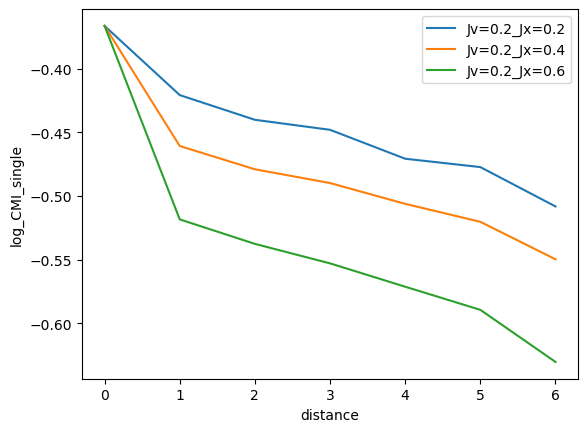

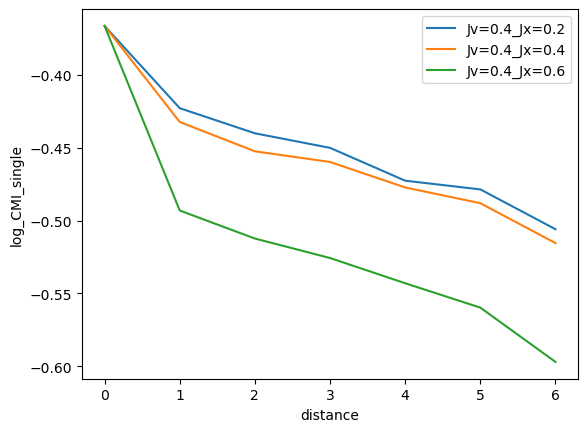

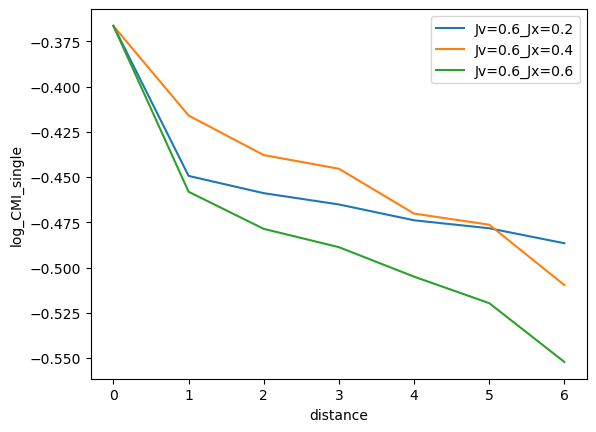

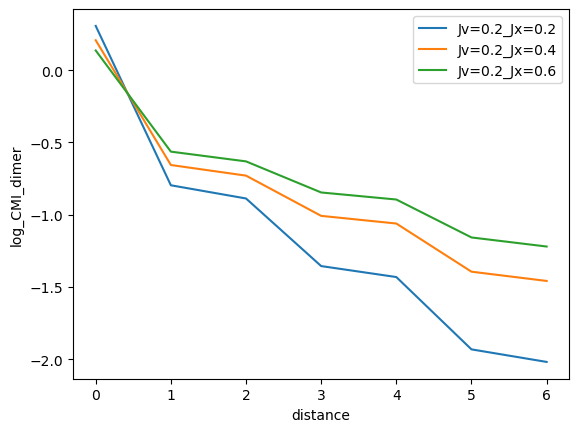

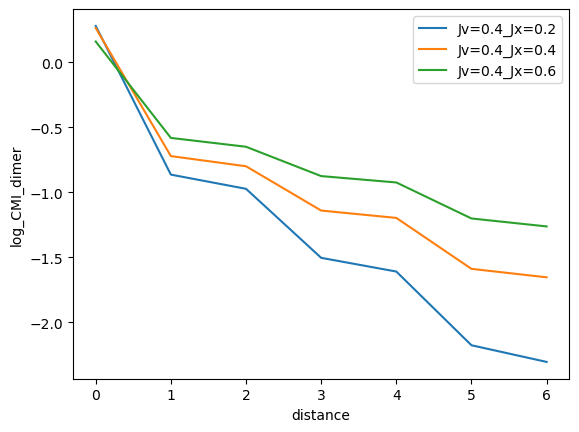

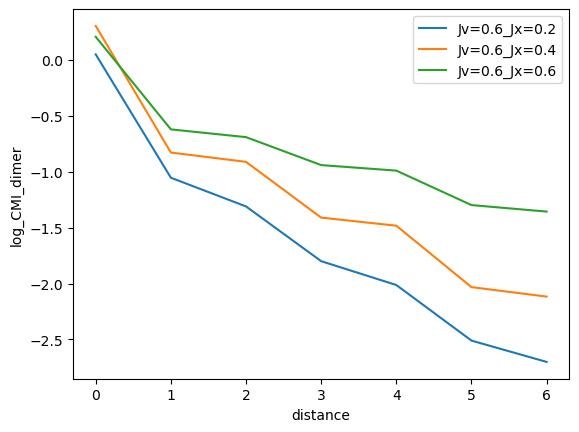

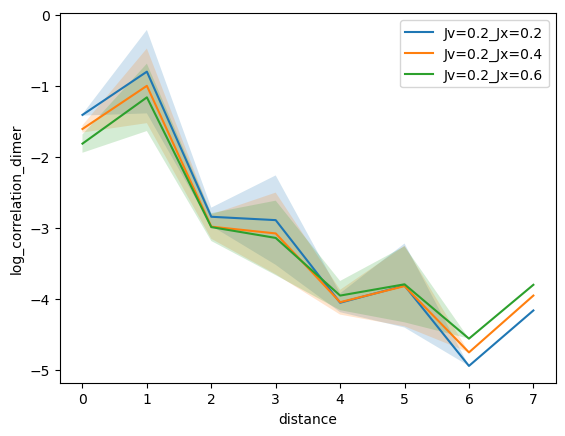

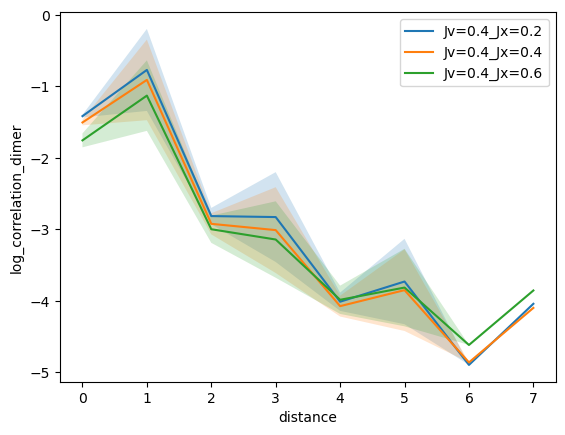

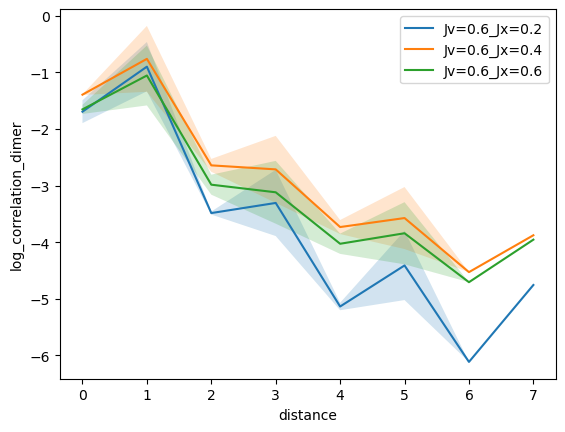

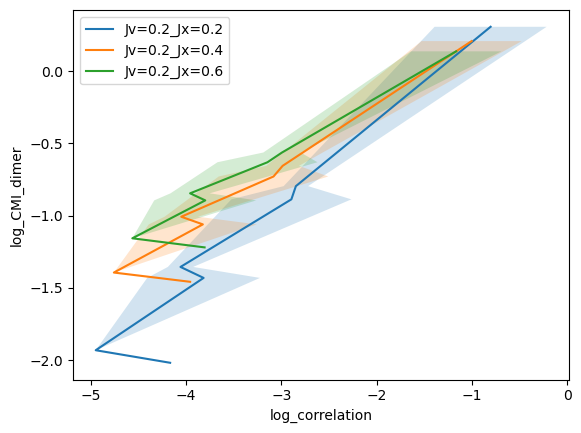

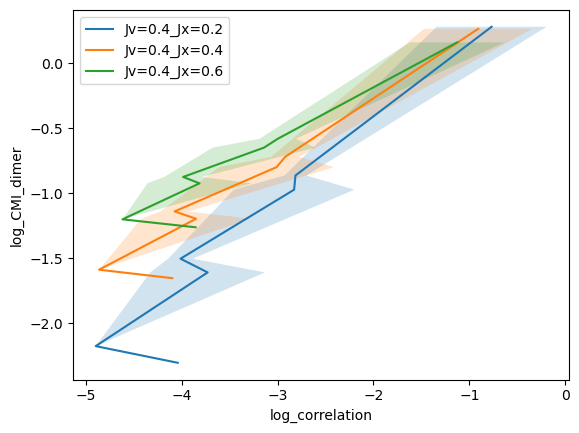

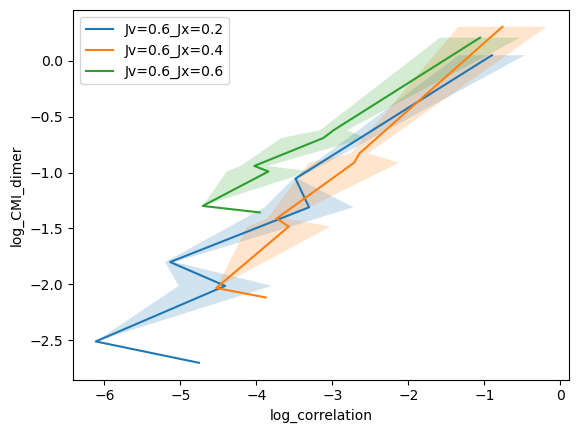

<Figure size 640x480 with 0 Axes>

In [24]:
for a in Jv_:
    for b in Jx_:
        i = (a, b)
        plt.plot(np.log(cmi_single[i]), label="Jv="+str(a)+"_Jx="+str(b))
    plt.xlabel("distance")
    plt.ylabel("log_CMI_single")
    plt.legend()
    plt.savefig("figure/ladder/cmi_single_ladder_L"+str(L)+"_Jv="+str(a)+"_periodic_"+str(periodic)+".png")
    plt.show()
    plt.clf()

for a in Jv_:
    for b in Jx_:
        i = (a, b)
        plt.plot(np.log(cmi_dimer[i]), label="Jv="+str(a)+"_Jx="+str(b))
    plt.xlabel("distance")
    plt.ylabel("log_CMI_dimer")
    plt.legend()
    plt.savefig("figure/ladder/cmi_dimer_ladder_L"+str(L)+"_Jv="+str(a)+"_periodic_"+str(periodic)+".png")
    plt.show()
    plt.clf()

for a in Jv_:
    for b in Jx_:
        i = (a, b)
        plt.plot(np.log(np.abs(mean_corr_dimer[i])), label="Jv="+str(a)+"_Jx="+str(b))
        if periodic == False:
            plt.fill_between(np.arange(len(mean_corr_dimer[i])) ,np.log(np.abs(mean_corr_dimer[i])) - 1/mean_corr_dimer[i]*np.sqrt(var_corr_dimer[i]) , np.log(np.abs(mean_corr_dimer[i])) + 1/np.abs(mean_corr_dimer[i])*np.sqrt(var_corr_dimer[i]), alpha=0.2)
    plt.xlabel("distance")
    plt.ylabel("log_correlation_dimer")
    plt.legend()
    plt.savefig("figure/ladder/correlation_ladder_dimer_L"+str(L)+"_Jv="+str(a)+"_periodic_"+str(periodic)+".png")
    plt.show()
    plt.clf()

if periodic == True:
    for a in Jv_:
        for b in Jx_:
            i = (a, b)
            plt.plot(np.log(np.abs(mean_corr_single[i])), label="Jv="+str(a)+"_Jx="+str(b))
            if periodic == False:
                plt.fill_between(np.arange(len(mean_corr_single[i])) ,np.log(np.abs(mean_corr_single[i])) - 1/mean_corr_single[i]*np.sqrt(var_corr[i]) , np.log(np.abs(mean_corr_single[i])) + 1/np.abs(mean_corr_single[i])*np.sqrt(var_corr[i]), alpha=0.2)
        plt.xlabel("distance")
        plt.ylabel("log_correlation_single")
        plt.legend()
        plt.savefig("figure/ladder/correlation_ladder_single_L"+str(L)+"_Jv="+str(a)+"_periodic_"+str(periodic)+".png")
        plt.show()
        plt.clf()

for a in Jv_:
    for b in Jx_:
        i = (a, b)
        if periodic == False:
            plt.plot(np.log(np.abs(mean_corr_dimer[i][1:])), np.log(cmi_dimer[i]), label="Jv="+str(a)+"_Jx="+str(b))
            plt.fill_betweenx(np.log(cmi_dimer[i]), np.log(np.abs(mean_corr_dimer[i][1:])) - 1/np.abs(mean_corr_dimer[i][1:])*np.sqrt(var_corr_dimer[i][1:]) , np.log(np.abs(mean_corr_dimer[i][1:])) + 1/np.abs(mean_corr_dimer[i][1:])*np.sqrt(var_corr_dimer[i][1:]), alpha=0.2)
        else:
            plt.plot(np.log(np.abs(mean_corr_dimer[i])), np.log(cmi_dimer[i]), label="Jv="+str(a)+"_Jx="+str(b))
    plt.xlabel("log_correlation")
    plt.ylabel("log_CMI_dimer")
    plt.legend()
    plt.savefig("figure/ladder/correlation_dimer_cmi_ladder_L"+str(L)+"_Jv="+str(a)+"_periodic_"+str(periodic)+".png")
    plt.show()
    plt.clf()
if periodic == True:
    for a in Jv_:
        for b in Jx_:
            i = (a, b)
            plt.plot(np.log(np.abs(mean_corr_single[i])), np.log(cmi_dimer[i]), label="Jv="+str(a)+"_Jx="+str(b))
        plt.xlabel("log_correlation")
        plt.ylabel("log_CMI_dimer")
        plt.legend()
        plt.savefig("figure/ladder/correlation_single_cmi_ladder_L"+str(L)+"_Jv="+str(a)+"_periodic_"+str(periodic)+".png")
        plt.show()
        plt.clf()

In [8]:
print(err_corre_length_dimer)

[]


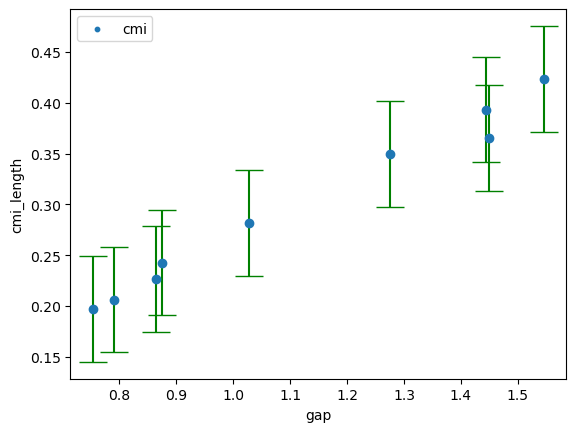

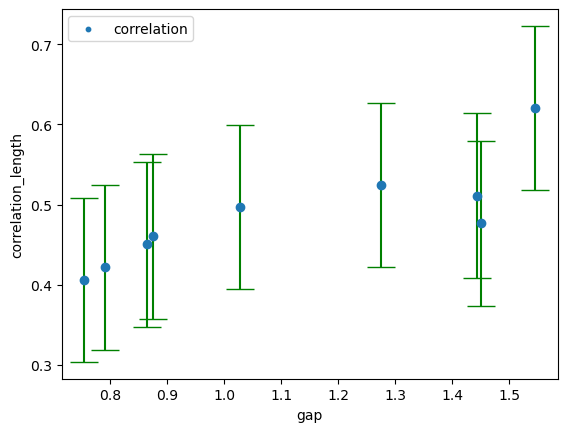

<Figure size 640x480 with 0 Axes>

In [25]:
gap_list = []
for a in Jv_:
    for b in Jx_:
        i = (a, b)
        gap_list.append(gap[i])

plt.scatter(gap_list, cmi_length, label="cmi", s=10)
plt.errorbar(gap_list, cmi_length, yerr=err_cmi_length[:][0], fmt='o', ecolor='g', capthick=1, capsize=10)
plt.xlabel("gap")
plt.ylabel("cmi_length")
plt.legend()
plt.savefig("figure/ladder/cmi_length_gap_ladder_L"+str(L)+"_periodic_"+str(periodic)+".png")
plt.show()
plt.clf()

plt.scatter(gap_list, corre_length_dimer, label="correlation", s=10)
plt.errorbar(gap_list, corre_length_dimer, yerr=err_corre_length_dimer[:][0], fmt='o', ecolor='g', capthick=1, capsize=10)
plt.xlabel("gap")
plt.ylabel("correlation_length")
plt.legend()
plt.savefig("figure/ladder/correlation_length_dimer_gap_ladder_L"+str(L)+"_periodic_"+str(periodic)+".png")
plt.show()
plt.clf()

if periodic == True:
    plt.scatter(gap_list, corre_length_single, label="correlation", s=10)
    plt.errorbar(gap_list, corre_length_single, yerr=err_corre_length_single[:][0], fmt='o', ecolor='g', capthick=1, capsize=10)
    plt.xlabel("gap")
    plt.ylabel("correlation_length")
    plt.legend()
    plt.savefig("figure/ladder/correlation_length_single_gap_ladder_L"+str(L)+"_periodic_"+str(periodic)+".png")
    plt.show()
    plt.clf()

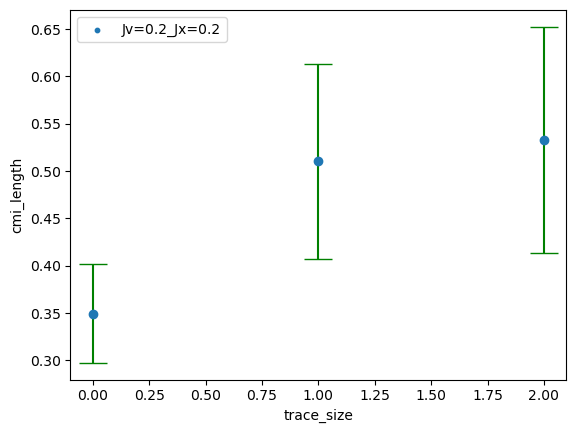

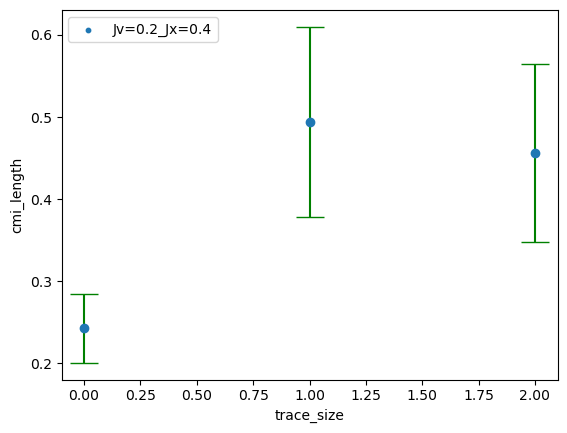

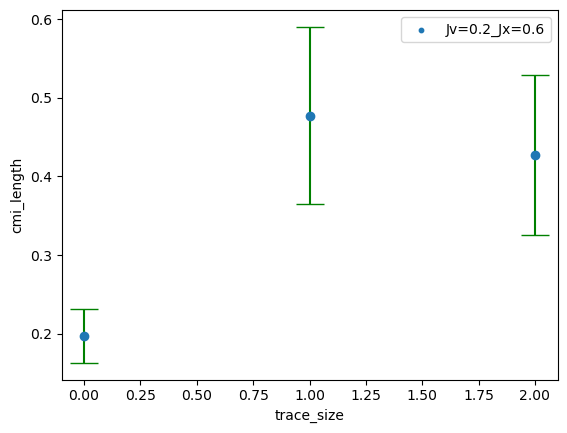

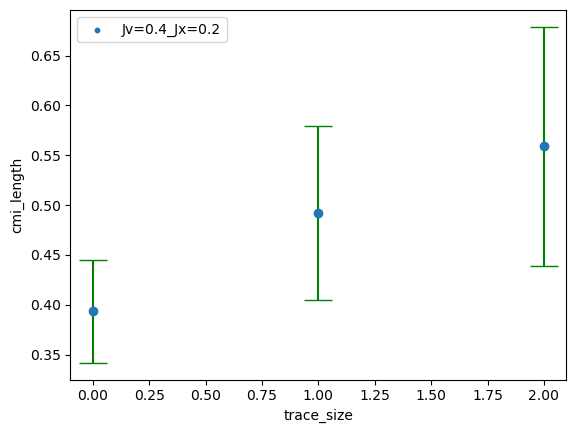

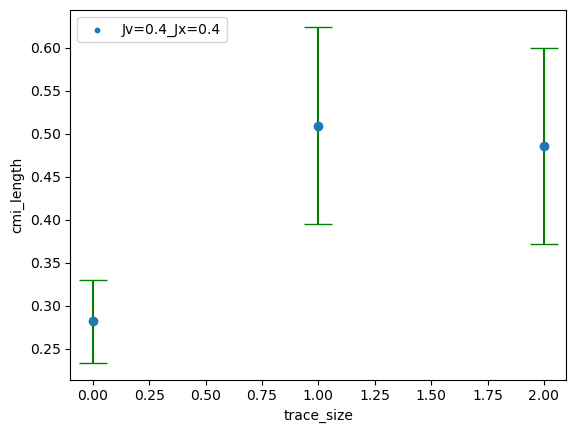

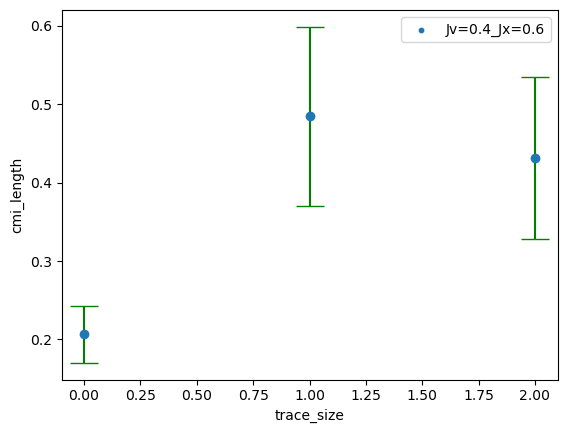

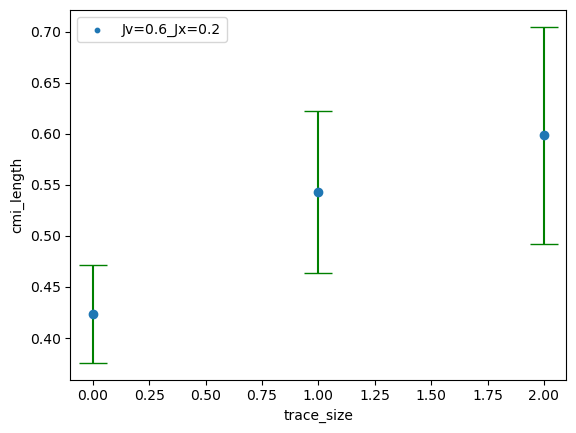

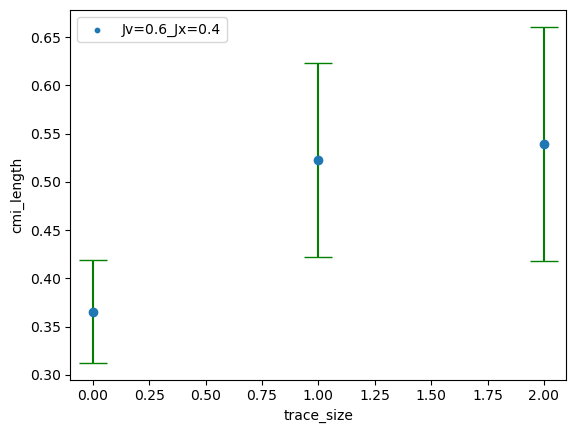

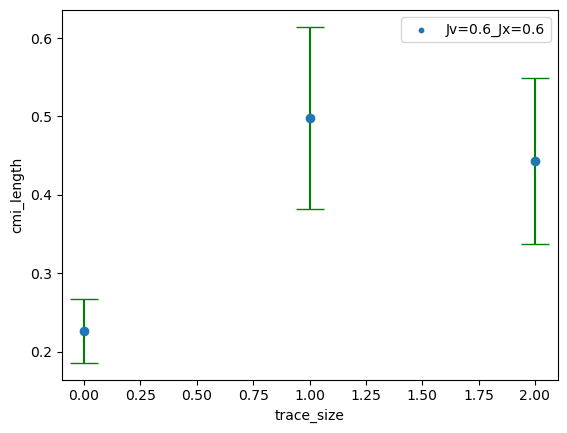

<Figure size 640x480 with 0 Axes>

In [26]:
for a in range(len(Jv_)):
    for b in range(len(Jx_)):
        plt.scatter(np.arange(len(cmi_length_traceout[a][b])), (cmi_length_traceout[a][b]), label="Jv="+str(Jv_[a])+"_Jx="+str(Jx_[b]), s=10)
        plt.errorbar(np.arange(len(cmi_length_traceout[a][b])), (cmi_length_traceout[a][b]), yerr=np.array(err_cmi_length_traceout[a][b]).ravel(), fmt='o', ecolor='g', capthick=1, capsize=10)
        plt.xlabel("trace_size")
        plt.ylabel("cmi_length")
        plt.legend()
        plt.savefig("figure/ladder/traceout/cmi_length_traceout_ladder_L"+str(L)+"Jv="+str(Jv_[a])+"_Jx="+str(Jx_[b])+"periodic_"+str(periodic)+".png")
        plt.show()
        plt.clf()

[[[0.20846623191528638, 0.48676050848447505, 0.5527580631369851],
  [0.1631687872692004, 0.48475238772077295, 0.5333273253161657],
  [0.1446655510343693, 0.4662818028381844, 0.5294640357181788]],
 [[0.22802782712429018, 0.4632831660656967, 0.5496546309725266],
  [0.17655515174317293, 0.490508476175203, 0.5413700021313995],
  [0.14762320022273284, 0.47043008762286376, 0.5295719038866499]],
 [[0.2392579538185525, 0.4852238233425015, 0.6230382306707467],
  [0.20752992739801085, 0.49300608050831896, 0.551596212079863],
  [0.15323288918940556, 0.4769820607628826, 0.5306164272974861]]]

1.23.5
